In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(X_train,y_train), (X_test,y_test) = mnist.load_data()

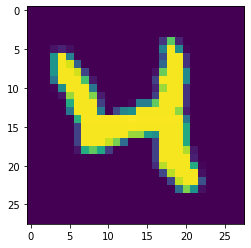

In [4]:
plt.imshow(X_train[20])

In [5]:
X_train = X_train/255
X_test = X_test/255

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Reshape
from tensorflow.keras.optimizers import SGD

In [7]:
28*28/2

392.0

In [9]:
X_train[0].shape

(28, 28)

In [10]:
encoder = Sequential()
encoder.add(Flatten(input_shape = [28,28]))
encoder.add(Dense(400,activation='relu'))
encoder.add(Dense(200,activation='relu'))
encoder.add(Dense(100,activation='relu'))
encoder.add(Dense(50,activation='relu'))
encoder.add(Dense(25,activation='relu'))

In [13]:
decoder = Sequential()
decoder.add(Dense(50,activation='relu', input_shape =[25]))
decoder.add(Dense(100,activation='relu'))
decoder.add(Dense(200,activation='relu'))
decoder.add(Dense(400,activation='relu'))
decoder.add(Dense(784,activation='sigmoid'))
decoder.add(Reshape([28,28]))

In [14]:
autoencoder =Sequential([encoder,decoder])

In [15]:
autoencoder.compile(loss = 'binary_crossentropy', optimizer = SGD(lr = 1.5), metrics=['accuracy'])

In [16]:
autoencoder.fit(X_train, X_train, epochs=5, validation_data=[X_test,X_test])

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
60000/60000 [==============================] - 56s 925us/sample - loss: 0.2542 - accuracy: 0.7923 - val_loss: 0.2181 - val_accuracy: 0.7943
Epoch 2/5
60000/60000 [==============================] - 41s 679us/sample - loss: 0.1902 - accuracy: 0.7968 - val_loss: 0.1751 - val_accuracy: 0.8018
Epoch 3/5
60000/60000 [==============================] - 37s 625us/sample - loss: 0.1675 - accuracy: 0.8003 - val_loss: 0.1601 - val_accuracy: 0.8029
Epoch 4/5
60000/60000 [==============================] - 53s 876us/sample - loss: 0.1549 - accuracy: 0.8029 - val_loss: 0.1492 - val_accuracy: 0.8015
Epoch 5/5
60000/60000 [==============================] - 53s 887us/sample - loss: 0.1473 - accuracy: 0.8044 - val_loss: 0.1420 - val_accuracy: 0.8061


In [17]:
passed_images = autoencoder.predict(X_test[:10])

Original Image


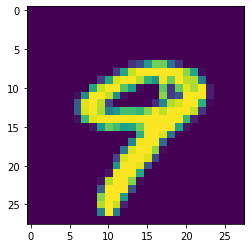

Attempted Reconstruction


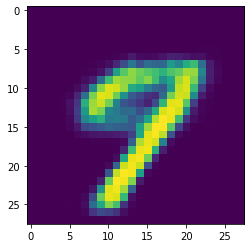

In [22]:
n = 9
print('Original Image')
plt.imshow(X_test[n])
plt.show()
print('Attempted Reconstruction')
plt.imshow(passed_images[n])

In [23]:
from tensorflow.keras.layers import GaussianNoise

In [24]:
sample = GaussianNoise(0.2)

In [25]:
noisey = sample(X_test[:10], training =True)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



Original


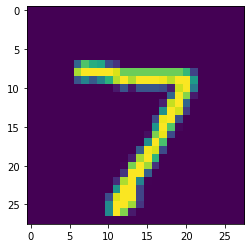

Noise Version


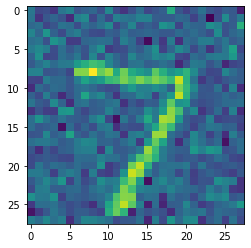

In [26]:
n = 0

print("Original")
plt.imshow(X_test[n])
plt.show()
print('Noise Version')
plt.imshow(noisey[n])
plt.show()

In [27]:
import tensorflow as tf

In [29]:
tf.random.set_seed(101)
np.random.seed(101)

encoder = Sequential()
encoder.add(Flatten(input_shape = [28,28]))

encoder.add(GaussianNoise(0.3))

encoder.add(Dense(400,activation='relu'))
encoder.add(Dense(200,activation='relu'))
encoder.add(Dense(100,activation='relu'))
encoder.add(Dense(50,activation='relu'))
encoder.add(Dense(25,activation='relu'))

In [30]:
decoder = Sequential()
decoder.add(Dense(50,activation='relu', input_shape =[25]))
decoder.add(Dense(100,activation='relu'))
decoder.add(Dense(200,activation='relu'))
decoder.add(Dense(400,activation='relu'))
decoder.add(Dense(784,activation='sigmoid'))
decoder.add(Reshape([28,28]))

In [31]:
noise_remover = Sequential([encoder,decoder])
noise_remover.compile(loss ='binary_crossentropy', optimizer ='adam', metrics = ['accuracy'])
noise_remover.fit(X_train,X_train,epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 53s 889us/sample - loss: 0.1727 - accuracy: 0.8011- loss: 0.1729 - accura
Epoch 2/5
60000/60000 [==============================] - 44s 730us/sample - loss: 0.1343 - accuracy: 0.8073
Epoch 3/5
60000/60000 [==============================] - 38s 640us/sample - loss: 0.1263 - accuracy: 0.8088
Epoch 4/5
60000/60000 [==============================] - 51s 855us/sample - loss: 0.1218 - accuracy: 0.8096
Epoch 5/5
60000/60000 [==============================] - 50s 839us/sample - loss: 0.1179 - accuracy: 0.8102


In [33]:
ten_noisy_images = sample(X_test[:10], training=True)
denoised_images = noise_remover(ten_noisy_images)

Original


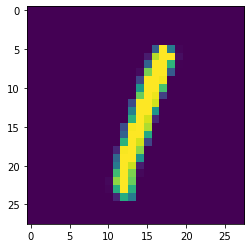

Noise Added Image


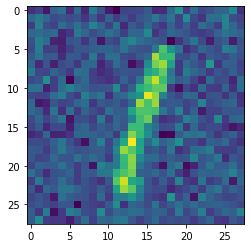

After Noise Removal


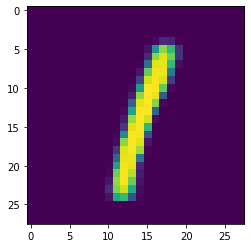

In [35]:
n = 5

print("Original")
plt.imshow(X_test[n])
plt.show()

print("Noise Added Image")
plt.imshow(ten_noisy_images[n])
plt.show()

print("After Noise Removal")
plt.imshow(denoised_images[n])
plt.show()